# Mental Health matters, always and everywhere

## Introduction

In this jupyter notebook I will explore the data that was found on Kaggle about Mental Health. The data consists of several factors, such as countries, years, mental and substance use, prevalence of depression and so on. This dataset will mainly be used to learn more skills, such as plotting data on world map and more useful and easy to read and understand visualisations.


### Geospatial Data Visualisation
Geographic data is a subset of Data Science that deals with location-based data. Geo data is important nowadays, since most businesses and applications revolve around the location element. Visualisations can be important to derive faster insights from location-based datasets.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import folium

In [33]:
prevalence_depression = pd.read_csv('/Users/Roz/Documents/mental_health_project/data/prevalence-of-depression-males-vs-females.csv')
prevalence_depression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56395 entries, 0 to 56394
Data columns (total 7 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             56395 non-null  object 
 1   Code                                                                               54079 non-null  object 
 2   Year                                                                               56395 non-null  int64  
 3   Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)    6840 non-null   float64
 4   Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)  6840 non-null   float64
 5   Population (historical estimates)                                                  55656 non-null  floa

In [34]:
prevalence_depression = prevalence_depression.rename(columns={"Entity":"Country", "Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)": "Prevalence_depr_male",
                        "Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)" : "Prevalence_depr_female", "Population (historical estimates)": "Population_estimate"})

prevalence_depression.head()

,Country,Code,Year,Prevalence_depr_male,Prevalence_depr_female,Population_estimate,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1990,4.291054,5.859656,12412311.0,NaN
2,Afghanistan,AFG,1991,4.293268,5.853078,13299016.0,NaN
3,Afghanistan,AFG,1992,4.298265,5.850020,14485543.0,NaN
4,Afghanistan,AFG,1993,4.303087,5.844987,15816601.0,NaN


In [35]:
prevalence_depression.isnull().sum()

Country                       0
Code                       2316
Year                          0
Prevalence_depr_male      49555
Prevalence_depr_female    49555
Population_estimate         739
Continent                 56110
dtype: int64

In [36]:
prevalence_depression = prevalence_depression.drop(['Continent'], axis = 1) #delete unnecessary columns
prevalence_depression.dropna(how='any', inplace=True)

In [37]:
prevalence_depression.isnull().sum()

Country                   0
Code                      0
Year                      0
Prevalence_depr_male      0
Prevalence_depr_female    0
Population_estimate       0
dtype: int64

In [38]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [39]:
world = world[['geometry','name', 'iso_a3']].copy()
world.head()

,geometry,name,iso_a3
0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,FJI
1,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,TZA
2,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",W. Sahara,ESH
3,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CAN
4,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,USA


In [40]:
world = world.rename(columns={0:"geometry", 'name':'Country', 'iso_a3':'Code'})
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  177 non-null    geometry
 1   Country   177 non-null    object  
 2   Code      177 non-null    object  
dtypes: geometry(1), object(2)
memory usage: 4.3+ KB


In [41]:
# centroid_list[['x_cor', 'y_cor']] = centroid_list.coordinates.str.split("(", expand = True) ignore

mergedDF = pd.merge(prevalence_depression, world, on = "Code")

mergedDF
#mergedDF.isnull().sum() # check whether there are null values

,Country_x,Code,Year,Prevalence_depr_male,Prevalence_depr_female,Population_estimate,geometry,Country_y
0,Afghanistan,AFG,1990,4.291054,5.859656,12412311.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan
1,Afghanistan,AFG,1991,4.293268,5.853078,13299016.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan
2,Afghanistan,AFG,1992,4.298265,5.850020,14485543.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan
3,Afghanistan,AFG,1993,4.303087,5.844987,15816601.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan
4,Afghanistan,AFG,1994,4.306053,5.843623,17075728.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan
...,...,...,...,...,...,...,...,...
5065,Zimbabwe,ZWE,2015,3.090039,3.927306,13814642.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",Zimbabwe
5066,Zimbabwe,ZWE,2016,3.094447,3.938356,14030338.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",Zimbabwe
5067,Zimbabwe,ZWE,2017,3.097194,3.946231,14236599.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",Zimbabwe
5068,Zimbabwe,ZWE,2018,3.092207,3.947673,14438812.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",Zimbabwe


In [42]:
mergedDF.describe() # The standard deviation is a measure that tells how spread out a group of numbers in a dataset are

,Year,Prevalence_depr_male,Prevalence_depr_female,Population_estimate
count,5070.000000,5070.000000,5070.000000,5.070000e+03
mean,2004.500000,3.203080,4.823656,3.841698e+07
std,8.656295,0.864724,1.177963,1.374544e+08
min,1990.000000,1.313565,1.962957,5.560400e+04
25%,1997.000000,2.612326,3.909668,3.461776e+06
50%,2004.500000,3.170903,4.863693,9.302266e+06
75%,2012.000000,3.712436,5.593480,2.571527e+07
max,2019.000000,7.258704,8.977151,1.433784e+09


/Users/Roz/Documents/mental_health_project/menth-env.env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

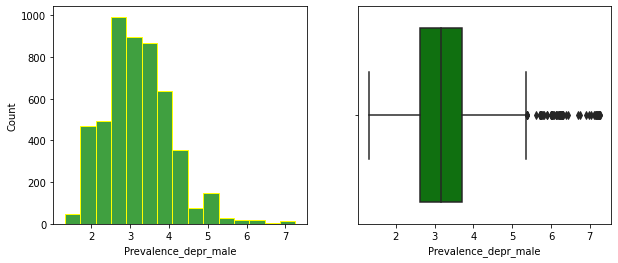

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

sns.histplot(mergedDF['Prevalence_depr_male'], ax=ax[0],bins=15, edgecolor="yellow", color="green")
sns.boxplot(mergedDF['Prevalence_depr_male'], ax=ax[1], color="green")
plt.show

# plt.boxplot(mergedDF['Prevalence_depr_male'])
# plt.show

# prev_depression_afghanistan = mergedDF.loc[mergedDF['Country'] == 'Afghanistan']
# prev_depression_afghanistan

# plt.hist(prev_depression_afghanistan['Prevalence_depr_male'], edgecolor = 'black')
# plt.show

/Users/Roz/Documents/mental_health_project/menth-env.env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

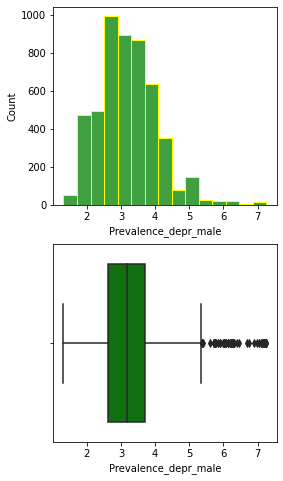

In [44]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(4,8))

sns.histplot(mergedDF['Prevalence_depr_male'], ax=ax[0],bins=15, edgecolor="yellow", color="green")
sns.boxplot(mergedDF['Prevalence_depr_male'], ax=ax[1], color="green")
plt.show


In [45]:
# def prev_categorized (row):
#     if row['Prevalence_depr_male'] >= 3.676174 :
#         return 'high'
#     elif row['Prevalence_depr_male'] >= 2.603879 :
#         return 'moderate'
#     else:
#         return 'low'

# mergedDF.apply(lambda row: prev_categorized(row), axis=1)

In [46]:
# mergedDF['Prevalence_male'] = mergedDF.apply(lambda row: prev_categorized(row), axis=1)
# mergedDF

In [47]:
def prev_categorized (row):
    if row['Prevalence_depr_female'] >= 3.676174 :
        return 'high'
    elif row['Prevalence_depr_female'] >= 2.603879 :
        return 'moderate'
    else:
        return 'low'

mergedDF['Prevalence_female'] = mergedDF.apply(lambda row: prev_categorized(row), axis=1)
mergedDF

,Country_x,Code,Year,Prevalence_depr_male,Prevalence_depr_female,Population_estimate,geometry,Country_y,Prevalence_female
0,Afghanistan,AFG,1990,4.291054,5.859656,12412311.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,high
1,Afghanistan,AFG,1991,4.293268,5.853078,13299016.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,high
2,Afghanistan,AFG,1992,4.298265,5.850020,14485543.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,high
3,Afghanistan,AFG,1993,4.303087,5.844987,15816601.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,high
4,Afghanistan,AFG,1994,4.306053,5.843623,17075728.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,high
...,...,...,...,...,...,...,...,...,...
5065,Zimbabwe,ZWE,2015,3.090039,3.927306,13814642.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",Zimbabwe,high
5066,Zimbabwe,ZWE,2016,3.094447,3.938356,14030338.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",Zimbabwe,high
5067,Zimbabwe,ZWE,2017,3.097194,3.946231,14236599.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",Zimbabwe,high
5068,Zimbabwe,ZWE,2018,3.092207,3.947673,14438812.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",Zimbabwe,high


<AxesSubplot:>

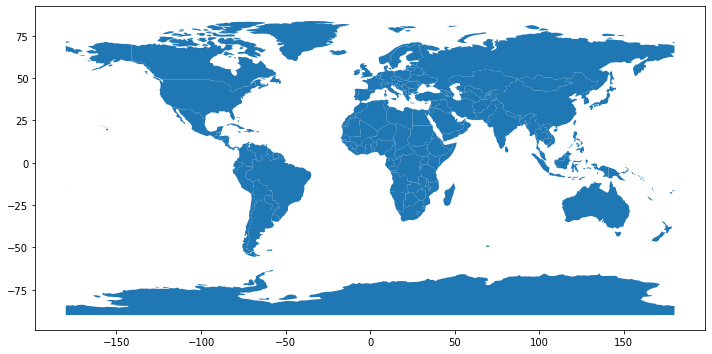

In [48]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
# world.head()

world.plot(figsize=(12,8))

In [49]:
gdf = geopandas.GeoDataFrame(mergedDF)

gdf.head()

,Country_x,Code,Year,Prevalence_depr_male,Prevalence_depr_female,Population_estimate,geometry,Country_y,Prevalence_female
0,Afghanistan,AFG,1990,4.291054,5.859656,12412311.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,high
1,Afghanistan,AFG,1991,4.293268,5.853078,13299016.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,high
2,Afghanistan,AFG,1992,4.298265,5.850020,14485543.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,high
3,Afghanistan,AFG,1993,4.303087,5.844987,15816601.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,high
4,Afghanistan,AFG,1994,4.306053,5.843623,17075728.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,high


In [50]:
prev_depression_2010 = mergedDF.loc[mergedDF['Year'] == 2010]
prev_depression_2010

,Country_x,Code,Year,Prevalence_depr_male,Prevalence_depr_female,Population_estimate,geometry,Country_y,Prevalence_female
20,Afghanistan,AFG,2010,4.367764,5.814176,29185511.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,high
50,Albania,ALB,2010,1.758570,3.412655,2948029.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Albania,moderate
80,Algeria,DZA,2010,3.415773,5.124895,35977451.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Algeria,high
110,Angola,AGO,2010,4.957225,6.626335,23356247.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",Angola,high
140,Argentina,ARG,2010,2.002276,3.119741,40895751.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",Argentina,moderate
...,...,...,...,...,...,...,...,...,...
4940,Venezuela,VEN,2010,2.771534,3.829454,28439942.0,"POLYGON ((-60.73357 5.20028, -60.60118 4.91810...",Venezuela,high
4970,Vietnam,VNM,2010,1.906991,3.183058,87967655.0,"POLYGON ((104.33433 10.48654, 105.19991 10.889...",Vietnam,moderate
5000,Yemen,YEM,2010,3.958559,6.079693,23154854.0,"POLYGON ((52.00001 19.00000, 52.78218 17.34974...",Yemen,high
5030,Zambia,ZMB,2010,3.573750,4.701585,13605986.0,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458...",Zambia,high


In [51]:
gdf = gpd.GeoDataFrame(prev_depression_2010)
gdf.head()


,Country_x,Code,Year,Prevalence_depr_male,Prevalence_depr_female,Population_estimate,geometry,Country_y,Prevalence_female
20,Afghanistan,AFG,2010,4.367764,5.814176,29185511.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614...",Afghanistan,high
50,Albania,ALB,2010,1.758570,3.412655,2948029.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",Albania,moderate
80,Algeria,DZA,2010,3.415773,5.124895,35977451.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",Algeria,high
110,Angola,AGO,2010,4.957225,6.626335,23356247.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",Angola,high
140,Argentina,ARG,2010,2.002276,3.119741,40895751.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",Argentina,moderate


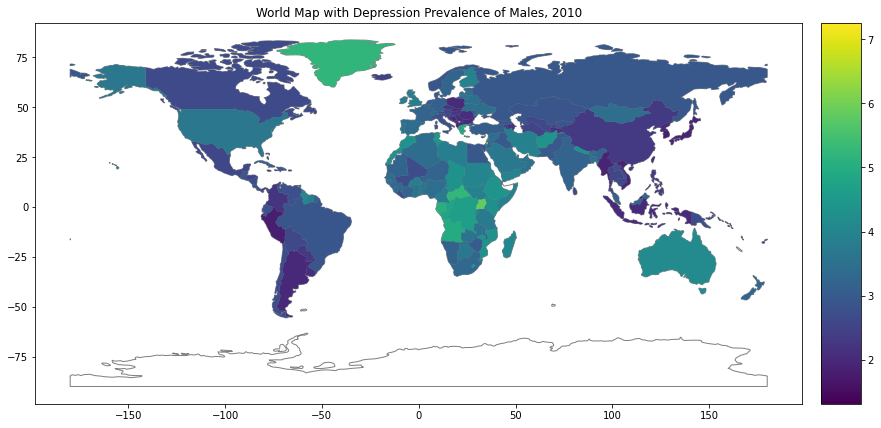

In [52]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(ax=ax, color='white', edgecolor='gray')
world_map_2010_male = gdf.plot(column='Prevalence_depr_male', ax=ax, markersize=50, legend=True, cax=cax)
world_map_2010_male.set_title("World Map with Depression Prevalence of Males, 2010")
plt.show()

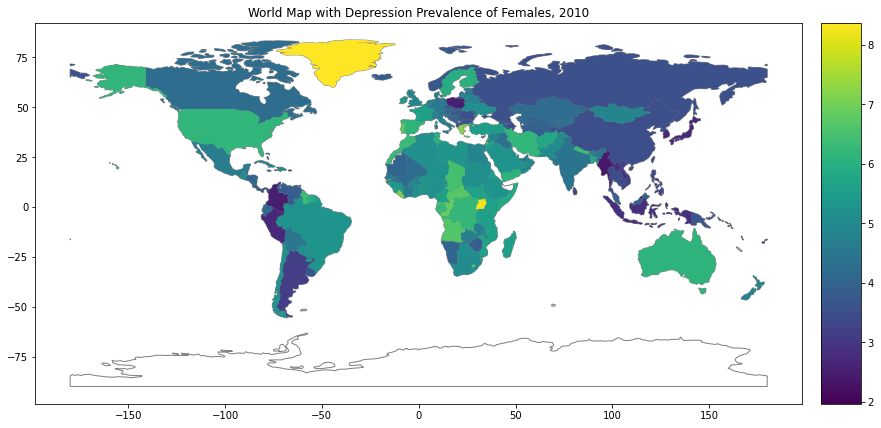

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(ax=ax, color='white', edgecolor='gray')
world_map_2010_female = gdf.plot(column='Prevalence_depr_female', ax=ax, markersize=50, legend=True, cax=cax)
world_map_2010_female.set_title("World Map with Depression Prevalence of Females, 2010")
plt.show()

In [54]:
# prev_depression_2010 = mergedDF.loc[mergedDF['Year'] == 2010]
# prev_depression_2010

# def prev_per_year(year):
#     if year in mergedDF['Year'] == year:
#         return mergedDF.loc[mergedDF['Year'] == year]
#     else:
#         return

# mergedDF['Prevalence_female'] = mergedDF.apply(lambda row: prev_categorized(row), axis=1)
# mergedDF
    

In [55]:
# grouped = mergedDF.groupby('Year')

# for year in grouped:
#   print('\nCREATE TABLE {}('.format(year))
  
#   print(year["column"])

In [56]:
# prev_depression_1970 = mergedDF.loc[mergedDF['Year'] == 1970]
# prev_depression_1970

# gdf = gpd.GeoDataFrame(prev_depression_1970)

# fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)

# world.plot(ax=ax, color='white', edgecolor='gray')
# world_map_1970_female = gdf.plot(column='Prevalence_depr_female', ax=ax, markersize=50, legend=True, cax=cax)
# world_map_1970_female.set_title("World Map with Depression Prevalence of Females, 2009")
# plt.show()

    

In [57]:
# prev_depression_1990 = mergedDF.loc[mergedDF['Year'] == 1990]
# prev_depression_1995 = mergedDF.loc[mergedDF['Year'] == 1995]
# prev_depression_2000 = mergedDF.loc[mergedDF['Year'] == 2000]
# prev_depression_2005 = mergedDF.loc[mergedDF['Year'] == 2005]

# gdf1990 = gpd.GeoDataFrame(prev_depression_1990)
# gdf1995 = gpd.GeoDataFrame(prev_depression_1995)
# gdf2000 = gpd.GeoDataFrame(prev_depression_2000)
# gdf2005 = gpd.GeoDataFrame(prev_depression_2005)


# plt.figure()
# fig = plt.figure(figsize=(80, 30))

# ax1 = plt.subplot2grid((4,6), (1,0))
# ax1.set_title("World Map with Depression Prevalence of Males, 1990")
# ax1.axis("off")

# ax2 = plt.subplot2grid((4,6), (1,1))
# ax2.set_title("World Map with Depression Prevalence of Males, 1995")
# ax2.axis("off")

# ax3 = plt.subplot2grid((4,6), (2,0))
# ax3.set_title("World Map with Depression Prevalence of Males, 2000")
# ax3.axis("off")

# ax4 = plt.subplot2grid((4,6), (2,1))
# ax4.set_title("World Map with Depression Prevalence of Males, 2005")
# ax4.axis("off")

# world_map_1990_male = gdf1990.plot(column='Prevalence_depr_male', ax=ax1, markersize=50, cmap='OrRd', cax=cax)
# world_map_1995_male = gdf1995.plot(column='Prevalence_depr_male', ax=ax2, markersize=50, cmap='OrRd', cax=cax)
# world_map_2000_male = gdf2000.plot(column='Prevalence_depr_male', ax=ax3, markersize=50, cmap='OrRd', cax=cax)
# world_map_2005_male = gdf2005.plot(column='Prevalence_depr_male', ax=ax4, markersize=50, cmap='OrRd', cax=cax)

# # fig.tight_layout
# plt.show

In [58]:
# import matplotlib.pyplot as plt

# plt.figure()
# ax1 = plt.subplot2grid((3, 3), (1, 0))
# ax2 = plt.subplot2grid((3, 3), (1, 1))
# ax4 = plt.subplot2grid((3, 3), (2, 0))
# ax5 = plt.subplot2grid((3, 3), (2, 1))
# plt.show()

In [59]:
# prev_depression_1990 = mergedDF.loc[mergedDF['Year'] == 1990]
# prev_depression_1995 = mergedDF.loc[mergedDF['Year'] == 1995]
# prev_depression_2000 = mergedDF.loc[mergedDF['Year'] == 2000]
# prev_depression_2005 = mergedDF.loc[mergedDF['Year'] == 2005]

# gdf1990 = gpd.GeoDataFrame(prev_depression_1990)
# gdf1995 = gpd.GeoDataFrame(prev_depression_1995)
# gdf2000 = gpd.GeoDataFrame(prev_depression_2000)
# gdf2005 = gpd.GeoDataFrame(prev_depression_2005)

# plt.figure()
# fig = plt.figure(figsize=(80, 30))

# ax1 = plt.subplot2grid((4,6), (1,0))
# ax1.set_title("World Map with Depression Prevalence of Females, 1990")
# ax1.axis("off")

# ax2 = plt.subplot2grid((4,6), (1,1))
# ax2.set_title("World Map with Depression Prevalence of Females, 1995")
# ax2.axis("off")

# ax3 = plt.subplot2grid((4,6), (2,0))
# ax3.set_title("World Map with Depression Prevalence of Females, 2000")
# ax3.axis("off")

# ax4 = plt.subplot2grid((4,6), (2,1))
# ax4.set_title("World Map with Depression Prevalence of Females, 2005")
# ax4.axis("off")

# world_map_1990_male = gdf1990.plot(column='Prevalence_depr_female', ax=ax1, markersize=50, cmap='OrRd', cax=cax)
# world_map_1995_male = gdf1995.plot(column='Prevalence_depr_female', ax=ax2, markersize=50, cmap='OrRd', cax=cax)
# world_map_2000_male = gdf2000.plot(column='Prevalence_depr_female', ax=ax3, markersize=50, cmap='OrRd', cax=cax)
# world_map_2005_male = gdf2005.plot(column='Prevalence_depr_female', ax=ax4, markersize=50, cmap='OrRd', cax=cax)

# # fig.tight_layout
# plt.show

In [60]:
years = range(1990,2010,5)

for i in years:
    if i == 1990:
      prev_depression_1990 = mergedDF.loc[mergedDF['Year'] == i]
      print(prev_depression_1990)
    if i == 1995:
      prev_depression_1995 = mergedDF.loc[mergedDF['Year'] == i]
      print(prev_depression_1995)
    if i == 2000:
      prev_depression_2000 = mergedDF.loc[mergedDF['Year'] == i]
      print(prev_depression_2000)
    if i == 2005:
      prev_depression_2005 = mergedDF.loc[mergedDF['Year'] == i]
      print(prev_depression_2005)
else:
    print("Stop")


        Country_x Code  Year  Prevalence_depr_male  Prevalence_depr_female  \
0     Afghanistan  AFG  1990              4.291054                5.859656   
30        Albania  ALB  1990              1.716314                3.304794   
60        Algeria  DZA  1990              3.570246                5.329909   
90         Angola  AGO  1990              5.228754                6.768976   
120     Argentina  ARG  1990              2.018407                3.390283   
...           ...  ...   ...                   ...                     ...   
4920    Venezuela  VEN  1990              2.651928                3.864511   
4950      Vietnam  VNM  1990              1.937023                3.261602   
4980        Yemen  YEM  1990              3.841665                6.041220   
5010       Zambia  ZMB  1990              3.516533                4.970868   
5040     Zimbabwe  ZWE  1990              2.850040                3.876535   

      Population_estimate                                      

In [61]:
dictionary_year = {}

for year in range(1990,2022):
    dictionary_year["key%s" %year] = mergedDF.loc[mergedDF['Year'] == year]

# print(dictionary_year["key1990"])

In [62]:
dictionary_gdf = {}

for gdf_year in range(1990, 2022):
    dictionary_gdf["gdf%s" %gdf_year] = gpd.GeoDataFrame(dictionary_year["key%s" %gdf_year])

# print(dictionary_gdf["gdf2000"])

<Figure size 432x288 with 0 Axes>

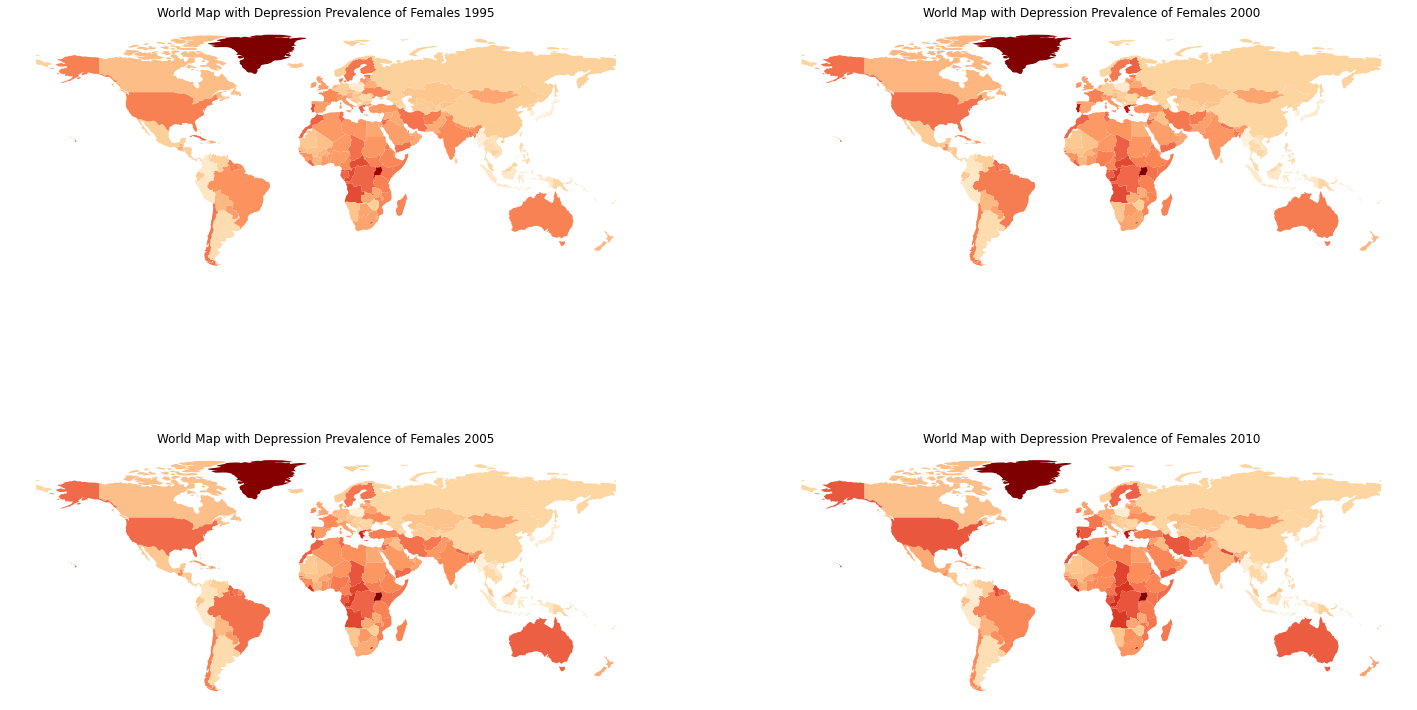

In [120]:
plt.figure()
fig = plt.figure(figsize=(80, 30))

year = 1995

for i in range(1,3):
    for j in range(0,2):
        # print(i,j,year)
        ax = plt.subplot2grid((4,6), (i,j))
        ax.set_title("World Map with Depression Prevalence of Females %s" %year)
        ax.axis("off")
        
        dictionary_gdf["gdf%s" %year].plot(column='Prevalence_depr_female', ax=ax, markersize=50, cmap='OrRd')
        year = year + 5
    plt.show

In [ ]:
dictionary_year["key1990"]